# 실습 과제
### 과제 1: 회귀 분석
목표: 특정 변수에 대한 선형 회귀 모델을 구축하고 평가합니다.

데이터셋: California Housing dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 선형 회귀 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, MSE와 R^2 점수를 계산합니다.
5. 실제 값과 예측 값을 시각화합니다.

In [1]:
from sklearn.datasets import fetch_california_housing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
california = fetch_california_housing()

# 데이터 분할
train_X, train_y = california.data, california.target
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_valid)

# 평가
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 0.5558915986952422
R^2: 0.5757877060324524


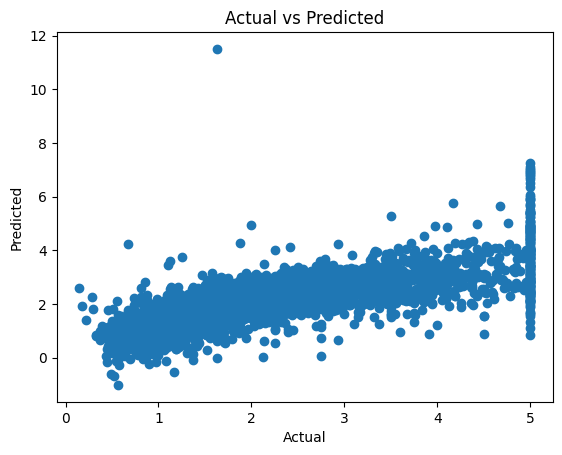

In [10]:
# 시각화
plt.scatter(y_valid, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

### 과제 2: 분류 분석
목표: 특정 데이터에 대한 나이브 베이즈 분류 모델을 구축하고 평가합니다.

데이터셋: Wine dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 나이브 베이즈 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, 정확도와 혼동 행렬을 계산합니다.
5. 혼동 행렬을 시각화합니다.


In [15]:
from sklearn.datasets import load_wine

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# 데이터 로드
wine = load_wine()
X = wine.data
y = wine.target

# 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = GaussianNB()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_valid)

# 평가
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_valid, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 1.0
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


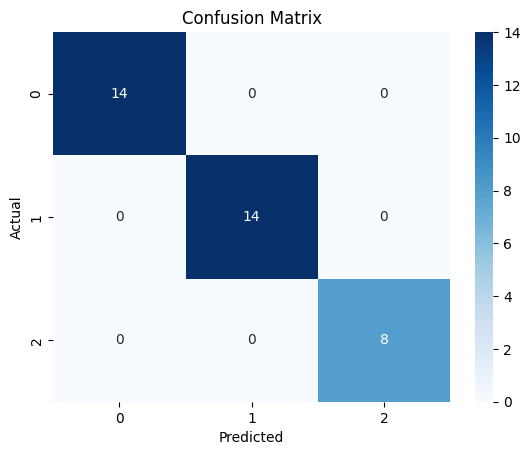

In [18]:
# 시각화
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###과제 3: 교차 검증

목표: 데이터에 대해 교차 검증을 수행하여 모델 성능을 평가합니다.

데이터셋: Diabetes dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 나이브 베이즈 모델을 사용하여 5-겹 교차 검증을 수행합니다.
3. 교차 검증 점수를 출력하고 평균 점수를 계산합니다.
4. 교차 검증 결과를 시각화합니다.


In [19]:
from sklearn.datasets import load_diabetes

In [27]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

# 데이터 로드
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# 나이브 베이즈 모델 생성
model = GaussianNB()

# 5-겹 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증 수행
cv_scores = cross_val_score(model, X, y, cv = kf)

# 교차 검증 점수 출력 (neg_mean_squared_error의 음수를 취하여 양수의 MSE로 변환)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV Score: {np.mean(cv_scores)}')

Cross-validation scores: [0.         0.         0.         0.01136364 0.        ]
Mean CV Score: 0.0022727272727272726


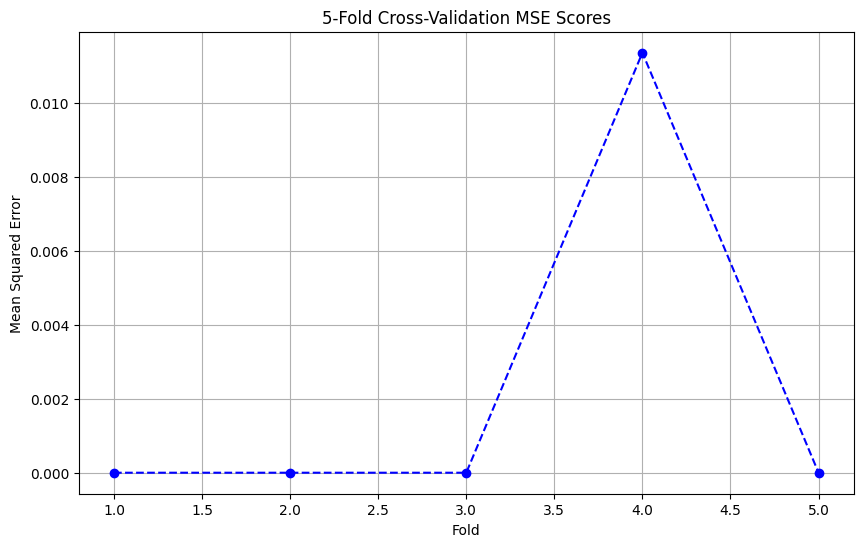

In [29]:
# 교차 검증 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='--', color='b')
plt.title('5-Fold Cross-Validation MSE Scores')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()